
#  ¿Ha muerto el rock?
## Análisis de datos de Spotify (2000–2024)

**Hipótesis:**  
El rock ha decaído en popularidad durante los últimos años frente a géneros más actuales como el pop, el hip-hop o la música electrónica.

**Datasets utilizados:**
1. `history-of-rock-spotify.csv`
2. `Global_Music_Streaming_Listener_Preferences.csv`
3. `Spotify_2024_Global_Streaming_Data.csv`


##  Importación de librerías y carga de datos

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Cargar datasets
rock = pd.read_csv("history-of-rock-spotify.csv")
prefs = pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")
spotify2024 = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
fav = pd.read_csv("mxmh_survey_results.csv")
tracks = pd.read_csv("rock_playlist_tracks_data.csv")

import warnings
warnings.filterwarnings("ignore")

display(rock.info(), prefs.info(), spotify2024.info(), fav.info(), tracks.info())



##  Limpieza de los CSVs

Antes de graficar, limpiamos los tres datasets para eliminar valores nulos, duplicados y tipos erróneos.



### 1. Eliminación de duplicados y espacios en columnas


In [2]:

for df in [rock, prefs, spotify2024]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    df.drop_duplicates(inplace=True)



### 2. Eliminación de valores nulos básicos


In [17]:

rock.dropna(how="all", inplace=True)
prefs.dropna(how="all", inplace=True)
spotify2024.dropna(how="all", inplace=True)




### 3. Limpieza avanzada para columnas numéricas
Convertimos todas las columnas numéricas a formato correcto, reemplazando `NaN` o `inf` por valores razonables.


In [30]:

def safe_numeric(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
            df[col] = df[col].replace([float("inf"), float("-inf")], pd.NA)
            df[col] = df[col].fillna(df[col].mean())
            if "year" in col.lower():
                df[col] = df[col].round().astype(int)
    return df

rock = safe_numeric(rock, rock.columns)
prefs = safe_numeric(prefs, prefs.columns)
spotify2024 = safe_numeric(spotify2024, spotify2024.columns)



##  Parte 1: Evolución histórica del rock en Spotify
Analizamos cómo ha cambiado la popularidad del rock a lo largo de los años.


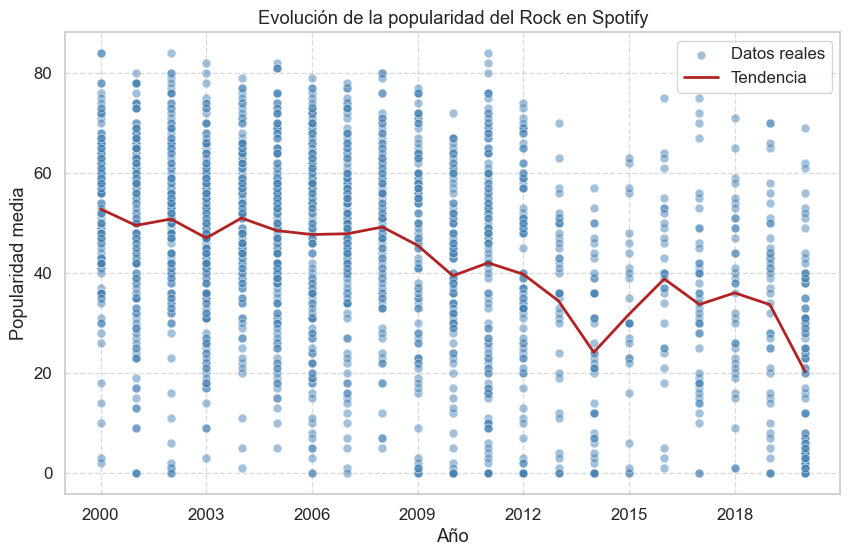

In [ ]:

rock = rock[(rock["release_date"] >= 2000) & (rock["release_date"] <= 2025)]


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rock,
    x="release_date", y="popularity",
    alpha=0.5, s=40, color="steelblue", label="Datos reales"
)
sns.lineplot(
    data=rock.groupby("release_date")["popularity"].mean().reset_index(),
    x="release_date", y="popularity",
    color="firebrick", linewidth=2, label="Tendencia"
)
plt.title("Evolución de la popularidad del Rock en Spotify")
plt.xlabel("Año")
plt.xticks(range(2000, 2020, 3))
plt.ylabel("Popularidad media")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


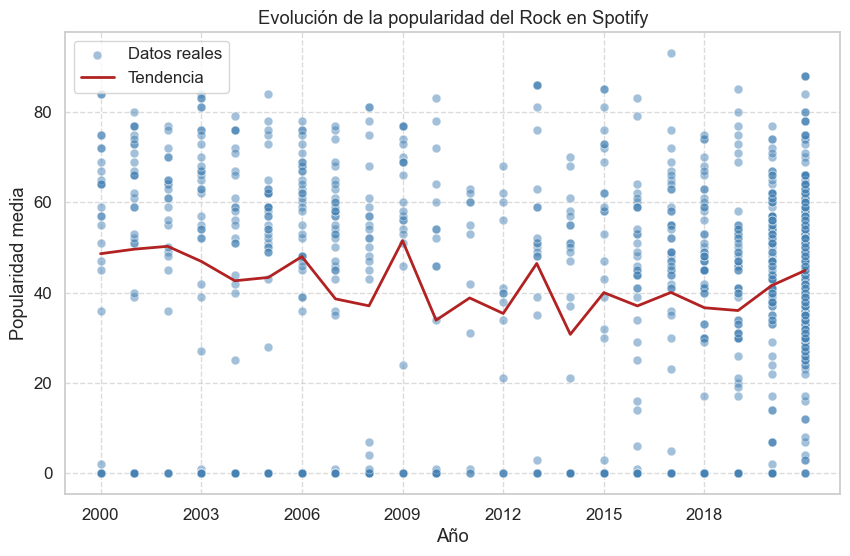

In [25]:
tracks = tracks[(tracks["release_date"] >= 2000) & (tracks["release_date"] <= 2025)]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=tracks,
    x="release_date", y="popularity",
    alpha=0.5, s=40, color="steelblue", label="Datos reales"
)
sns.lineplot(
    data=tracks.groupby("release_date")["popularity"].mean().reset_index(),
    x="release_date", y="popularity",
    color="firebrick", linewidth=2, label="Tendencia"
)
plt.title("Evolución de la popularidad del Rock en Spotify")
plt.xlabel("Año")
plt.xticks(range(2000, 2020, 3))
plt.ylabel("Popularidad media")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



##  Parte 2: Preferencias globales de oyentes
Analizamos el peso del rock dentro de las preferencias globales de los oyentes por género.


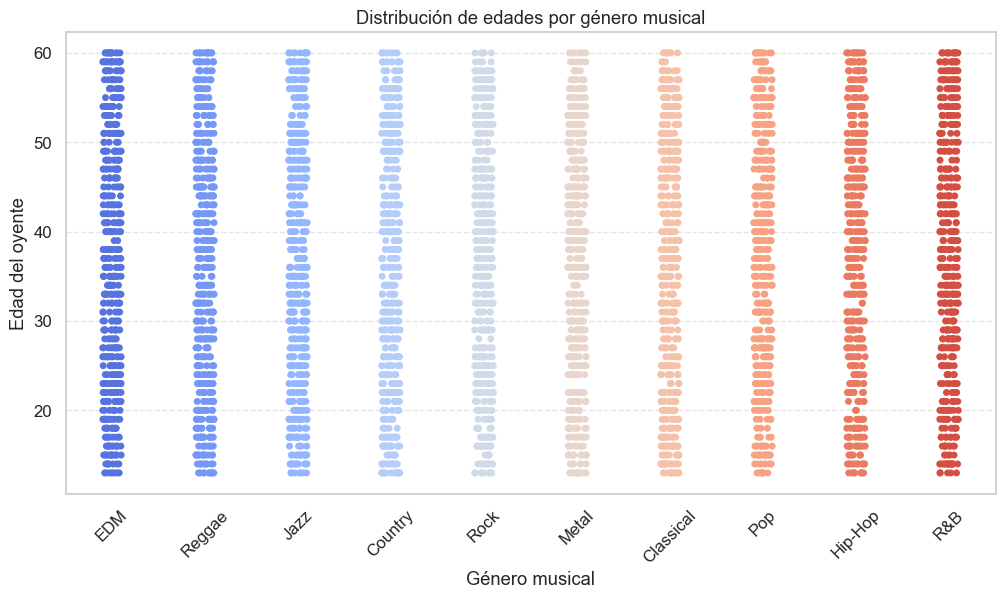

In [4]:
# Filtrar filas sin edad o género
prefs = prefs.dropna(subset=["Age", "Top_Genre"])

# Ordenar los géneros por edad promedio (opcional)
genre_order = prefs.groupby("Top_Genre")["Age"].mean().sort_values().index

# Gráfico de dispersión por género
plt.figure(figsize=(12,6))
sns.stripplot(data=prefs, x="Top_Genre", y="Age", order=genre_order,
              jitter=True, palette="coolwarm", size=5)

plt.title("Distribución de edades por género musical")
plt.xlabel("Género musical")
plt.ylabel("Edad del oyente")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


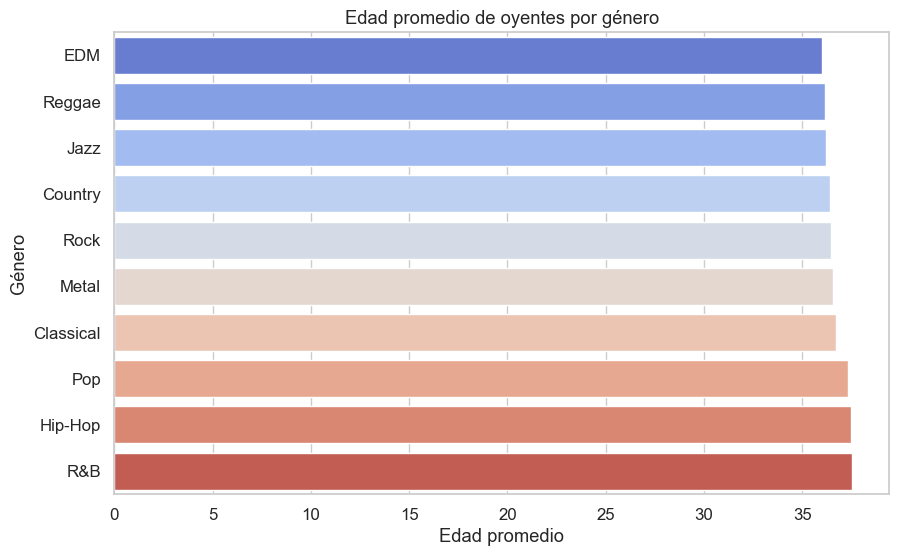

In [5]:
Genre = prefs.groupby("Top_Genre")["Age"].mean().reset_index() \
             .sort_values("Age", ascending=True)  # ascendente para barras horizontales

plt.figure(figsize=(10,6))
sns.barplot(data=Genre, x="Age", y="Top_Genre", palette="coolwarm")
plt.title("Edad promedio de oyentes por género")
plt.xlabel("Edad promedio")
plt.ylabel("Género")
plt.show()



##  Parte 3: Popularidad actual (2024)
Comprobamos cómo se posiciona el rock frente a otros géneros en los datos más recientes de Spotify (2024).


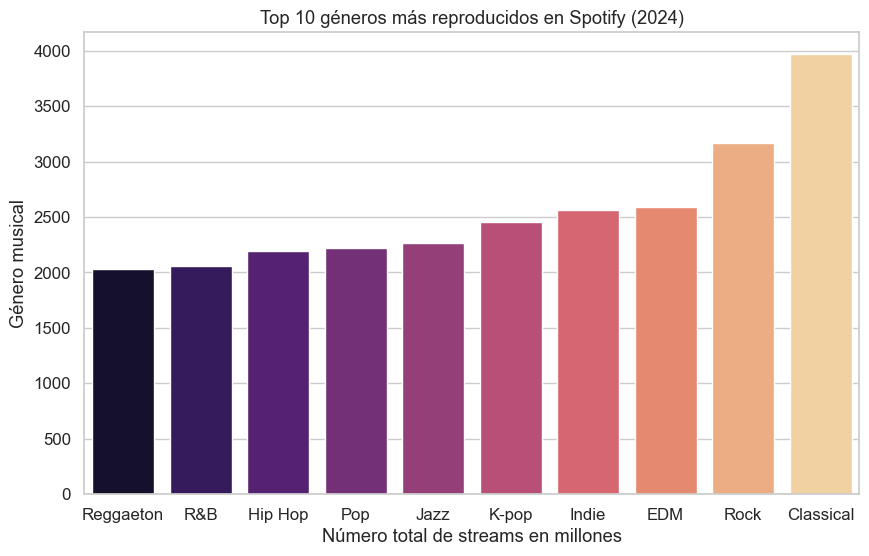

In [7]:

genre_counts = spotify2024.groupby("Genre")["Monthly_Listeners_(Millions)"].sum().reset_index().sort_values("Monthly_Listeners_(Millions)")

plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, x="Genre", y="Monthly_Listeners_(Millions)", palette="magma")
plt.title("Top 10 géneros más reproducidos en Spotify (2024)")
plt.xlabel("Número total de streams en millones")
plt.ylabel("Género musical")
plt.show()



##  Conclusión
- La **popularidad histórica del rock** muestra una tendencia descendente.
- Las **preferencias globales** confirman que otros géneros superan al rock en oyentes.
- En **2024**, los géneros dominantes en Spotify son el pop, el hip-hop y la música urbana.

> **Conclusión final:**  
> Los datos apoyan la hipótesis de que el rock ha perdido peso en la industria musical moderna.  
> Aunque sigue siendo un género fundamental históricamente, su impacto actual en las plataformas de streaming es mucho menor.
